In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# for each file in the directory data, read the file with pandas and concatenate the data to a single dataframe
df = pd.DataFrame()
for file in os.listdir('data'):
    df = pd.concat([df, pd.read_parquet('data/' + file)])

# print the first 5 rows of the dataframe
df.shape


(431371, 78)

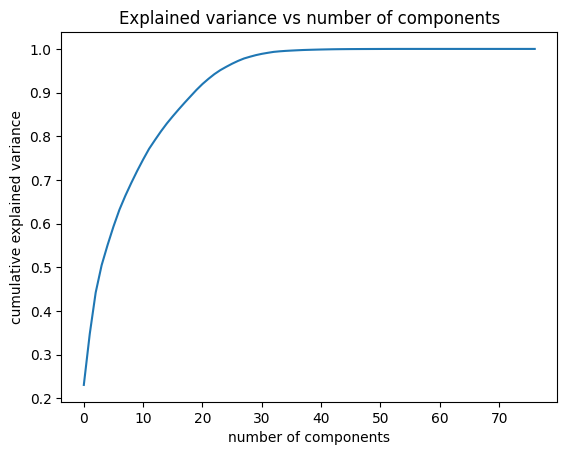

In [24]:
# find the optimal number of components for PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df.reset_index(inplace=True, drop=True)


# separate the features from the labels
X = df.drop('Label', axis=1)
y = df['Label']

# standardize the features
X = StandardScaler().fit_transform(X)

# find the optimal number of components
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Explained variance vs number of components')
plt.show()

In [25]:

# perform PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df.reset_index(inplace=True, drop=True)


# separate the features from the labels
X = df.drop('Label', axis=1)
y = df['Label']

# standardize the features
X = StandardScaler().fit_transform(X)

# perform PCA
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X)

# create a dataframe with the principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component ' + str(i) for i in range(1, 21)])

# concatenate the labels to the dataframe
principalDf = pd.concat([principalDf, df[['Label']]], axis=1)

# print the first 5 rows of the dataframe
principalDf.head()



,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,...,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16,principal component 17,principal component 18,principal component 19,principal component 20,Label
0,-6.042866,7.010801,-4.354454,-0.921711,0.340654,0.250851,-0.800816,0.272154,-1.172750,-0.616133,...,3.369837,0.695516,-0.734748,-0.137723,1.127820,0.985388,0.669662,-1.819810,-0.494356,DrDoS_DNS
1,-6.627792,8.010457,-5.206928,-1.548664,3.592294,-0.173981,-0.556394,-0.257748,1.034070,0.131174,...,1.289473,0.587595,-0.710413,-0.381692,0.813811,1.020428,0.392015,-1.303561,-0.663077,DrDoS_DNS
2,-7.238132,9.053575,-6.096481,-2.202869,6.985323,-0.617241,-0.301380,-0.810457,3.336910,0.910853,...,-0.881359,0.474969,-0.685018,-0.636272,0.486133,1.056998,0.102296,-0.764870,-0.839136,DrDoS_DNS
3,-7.238131,9.053575,-6.096481,-2.202869,6.985323,-0.617241,-0.301380,-0.810457,3.336910,0.910853,...,-0.881360,0.474967,-0.685024,-0.636272,0.486133,1.056998,0.102296,-0.764870,-0.839136,DrDoS_DNS
4,-7.134738,8.877447,-5.988284,-2.174023,6.922695,-0.617498,-0.294627,-0.811210,3.317154,0.906640,...,-0.928370,0.453467,-0.669881,-0.623711,0.460116,1.021778,0.089308,-0.721011,-0.816056,DrDoS_DNS


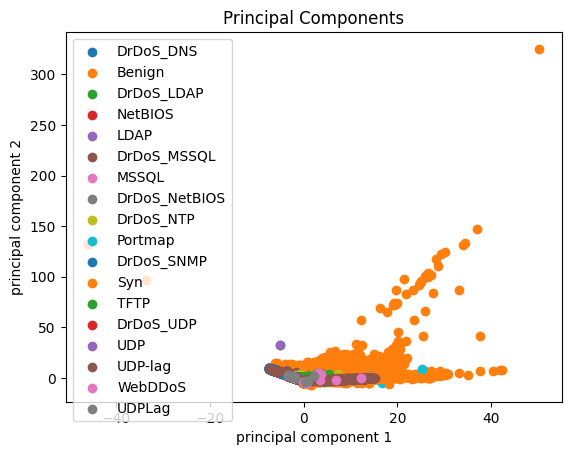

In [30]:
# visualize the data

# separate the data by label
for label in principalDf['Label'].unique():
    df = principalDf[principalDf['Label'] == label]
    plt.scatter(df['principal component 1'], df['principal component 2'], label=label)
# plot size
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('Principal Components')
plt.legend()
plt.show()

